In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [5]:
X= df.drop('heart disease',axis=1)
y=df['heart disease'].copy()

In [6]:
type(y)

pandas.core.series.Series

### Test train split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [9]:
X_train.shape,y_train.shape

((189, 4), (189,))

### builing decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

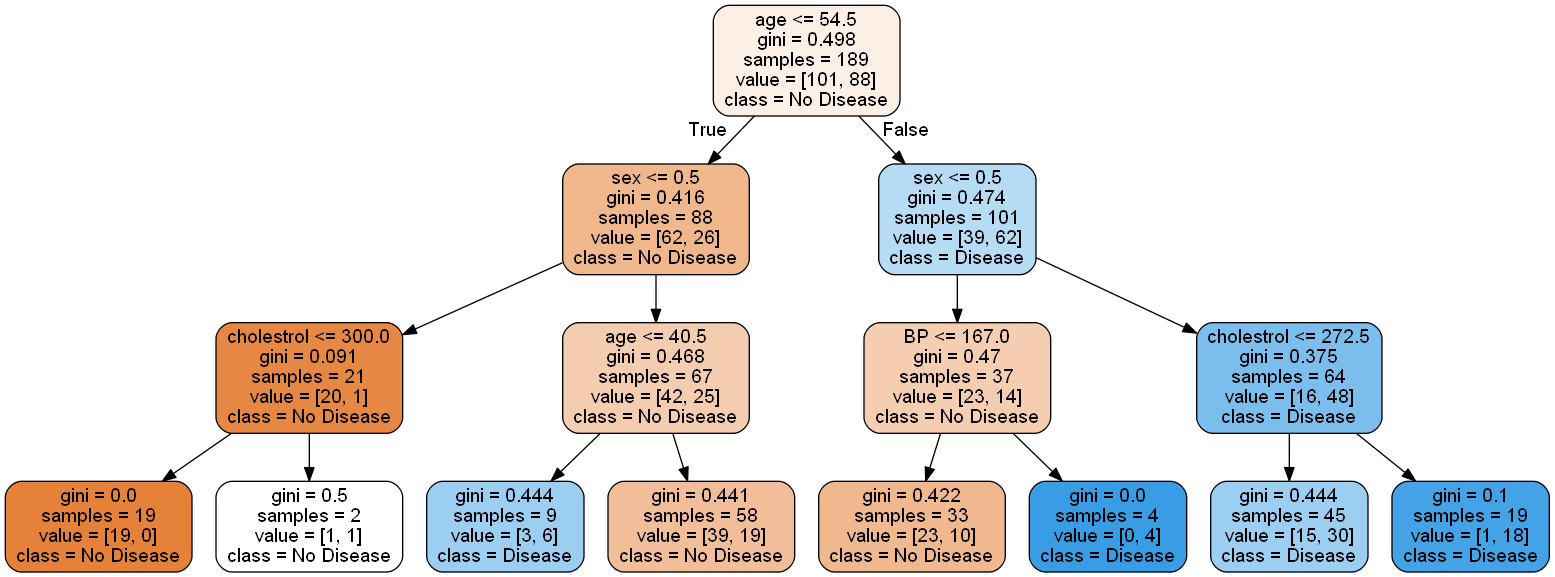

In [14]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluate tree model

In [15]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
accuracy_score(y_train,y_train_pred)

0.7407407407407407

In [18]:
confusion_matrix(y_train,y_train_pred)

array([[82, 19],
       [30, 58]], dtype=int64)

In [19]:
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.6049382716049383
[[35 14]
 [18 14]]


In [20]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [21]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [22]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

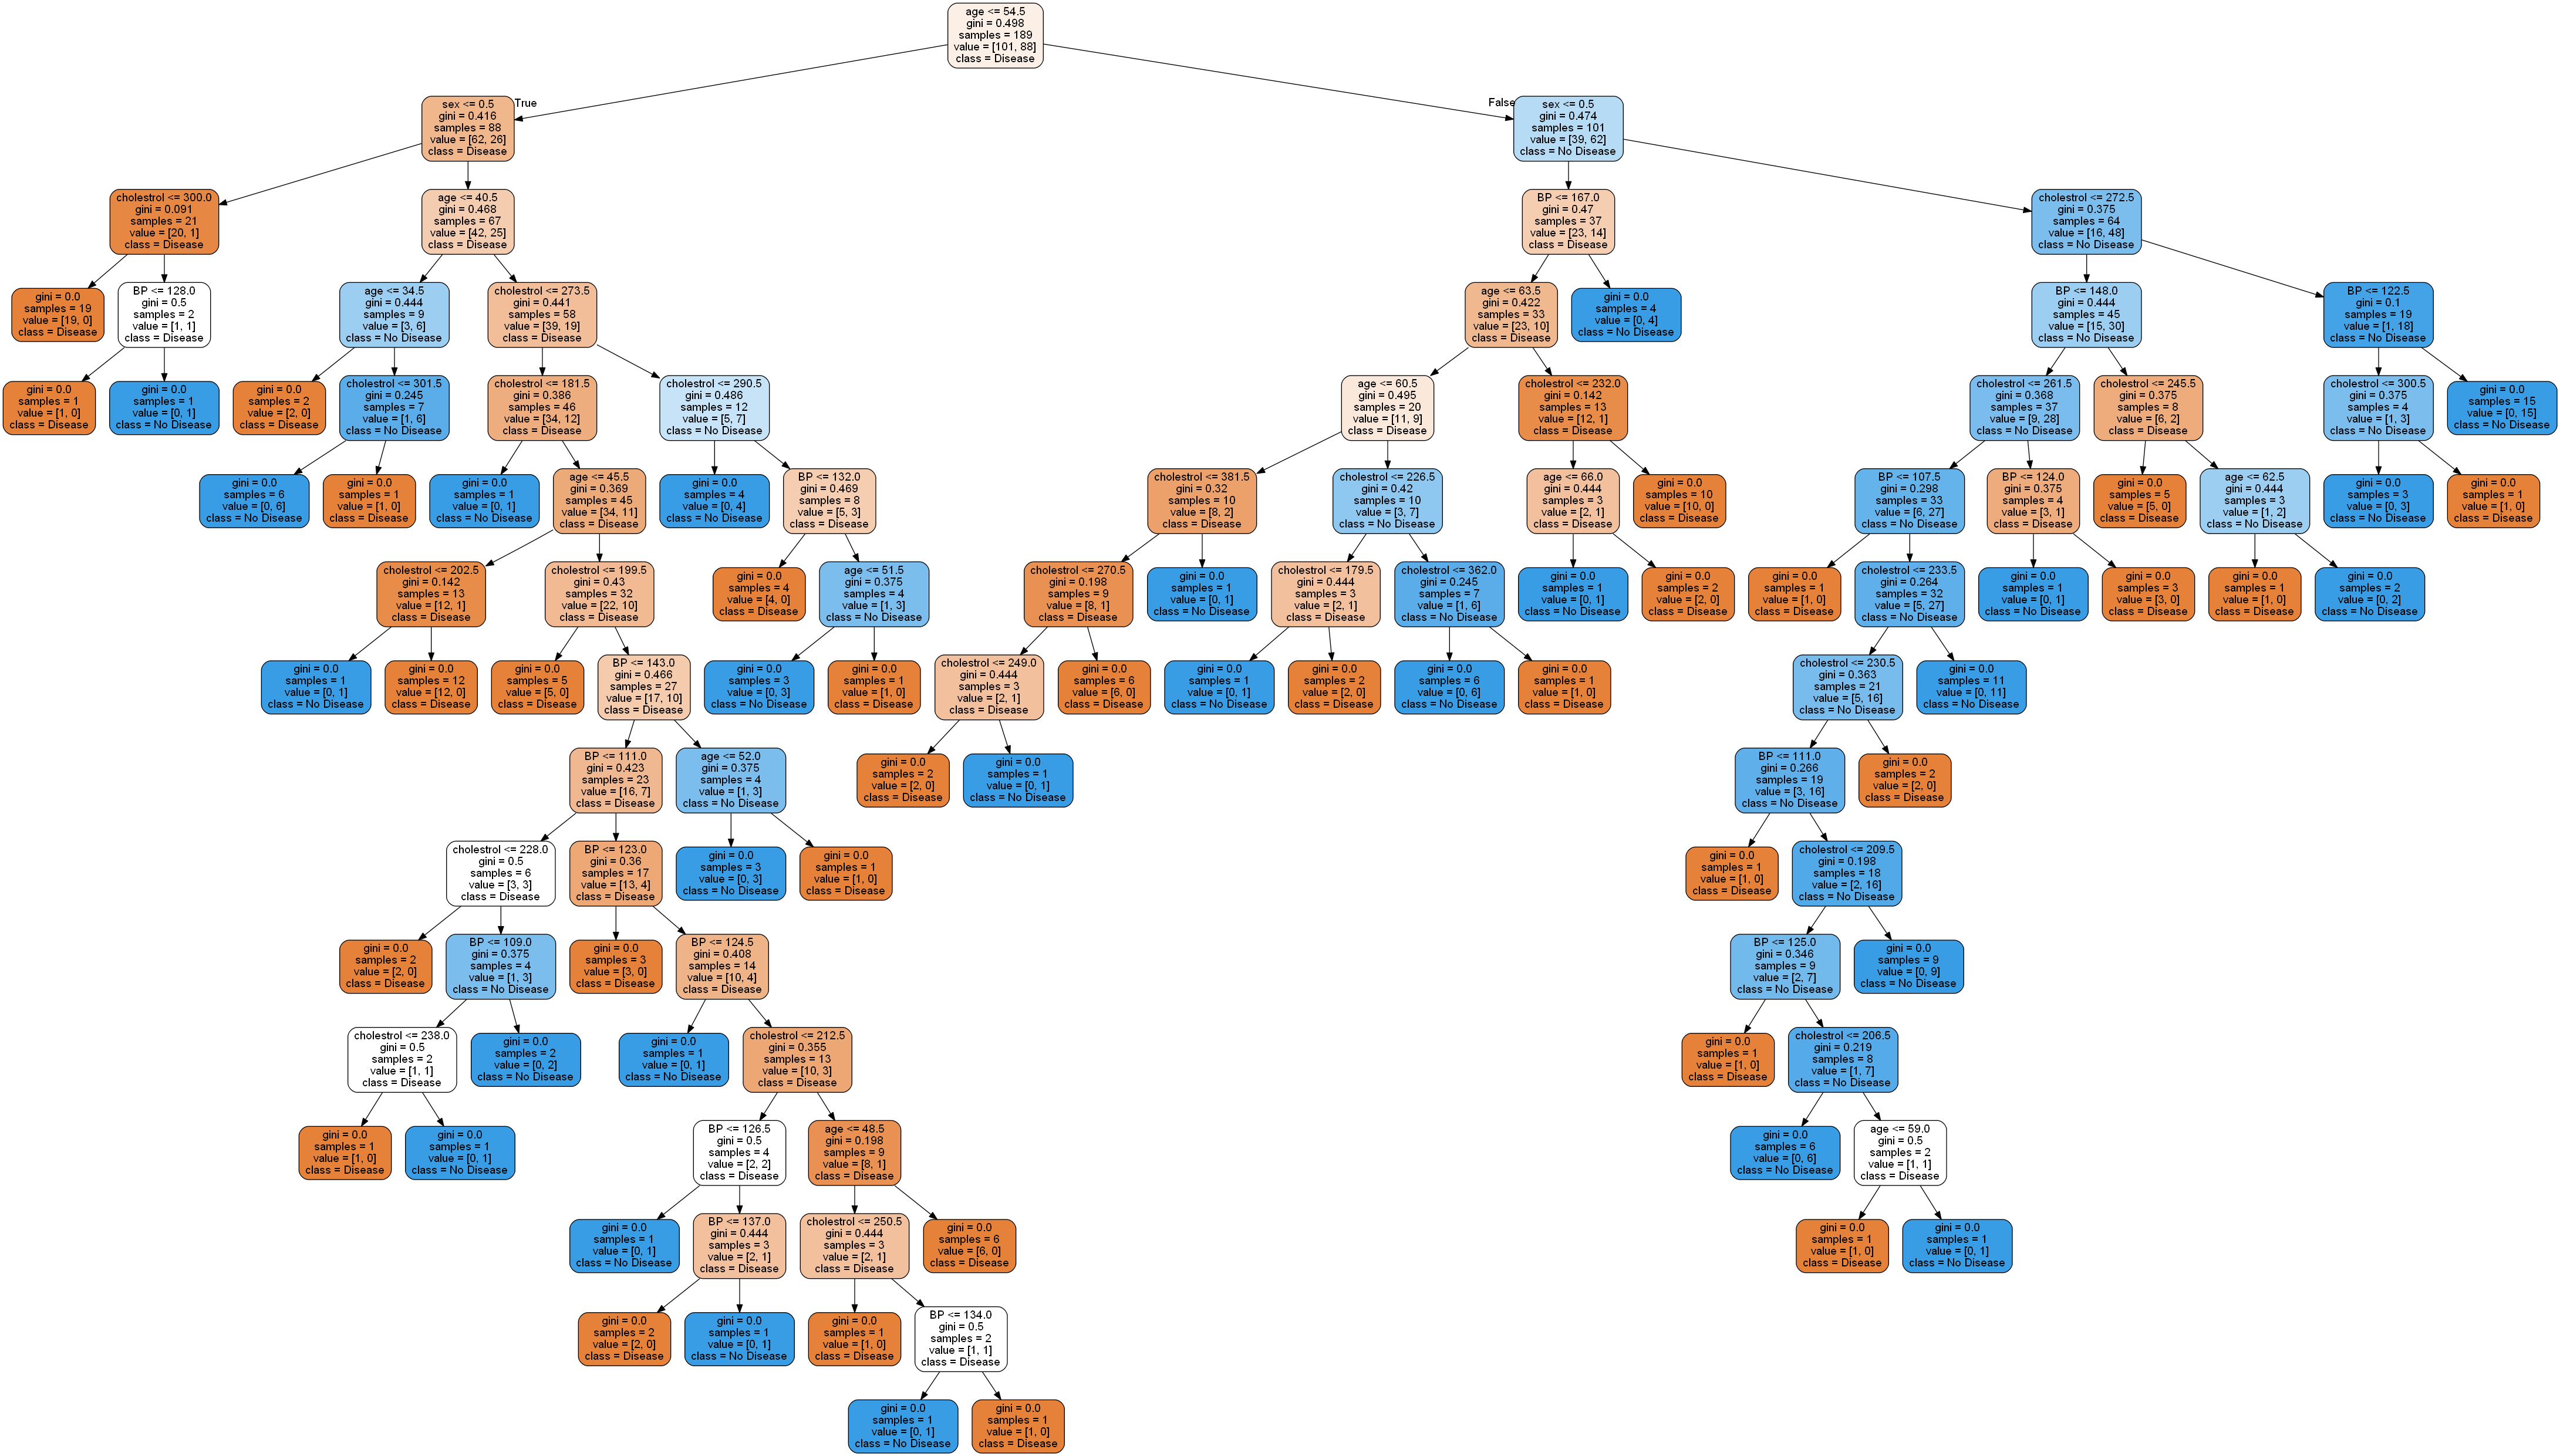

In [23]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

## Delighted Members

In [24]:
df=pd.read_csv('Delhi_Delights_Data.csv')
df.head()

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [25]:
len(df)

30

In [26]:
df.shape

(30, 3)

In [27]:
df.columns=['Delivery_Rating','Orders_per_month','Delighted_Members']
df.head()

,Delivery_Rating,Orders_per_month,Delighted_Members
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [28]:
df.isna().sum()

Delivery_Rating      0
Orders_per_month     0
Delighted_Members    0
dtype: int64

In [29]:
X = df.drop('Delighted_Members',axis=1)
y=df['Delighted_Members']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=.7, random_state=42)

In [32]:
X_train.shape,y_train.shape

((21, 2), (21,))

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [35]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10,min_samples_leaf=5,criterion='gini')
dt.fit(X,y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [36]:
94/225,100/225,106/225,112/225

(0.4177777777777778,
 0.4444444444444444,
 0.4711111111111111,
 0.49777777777777776)

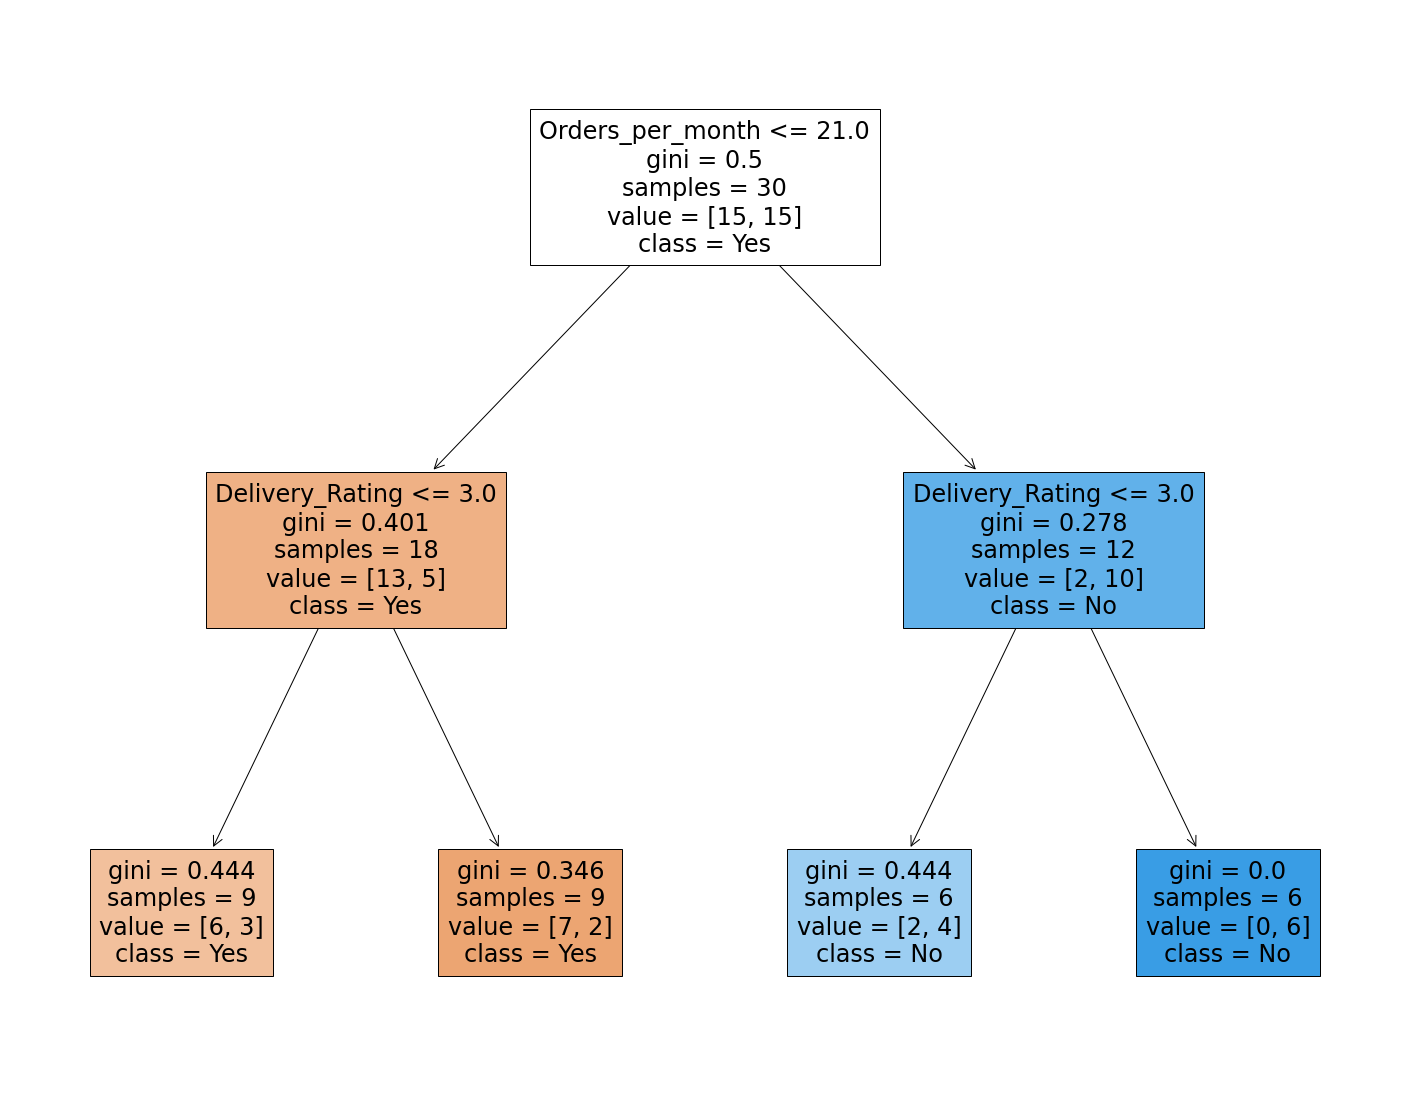

In [37]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [38]:
df

,Delivery_Rating,Orders_per_month,Delighted_Members
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No
5,4.5,11,Yes
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
9,3.5,13,No


In [39]:
len(df[(df.Delighted_Members=='Yes')])

15

In [40]:
112/225

0.49777777777777776

In [41]:
(65/324)+(5/36)

0.3395061728395062

In [42]:
len(df[(df.Orders_per_month<20) & (df.Delighted_Members=='No')])

13

In [43]:
(df[df.Delighted_Members=='Yes']).sort_values('Delivery_Rating')

,Delivery_Rating,Orders_per_month,Delighted_Members
0,1.5,11,Yes
6,1.5,13,Yes
12,1.5,15,Yes
19,2.5,27,Yes
20,2.5,27,Yes
25,2.5,39,Yes
26,2.5,39,Yes
21,3.5,27,Yes
27,3.5,39,Yes
5,4.5,11,Yes


In [44]:
(df[df.Delighted_Members=='Yes']).sort_values('Delivery_Rating')

,Delivery_Rating,Orders_per_month,Delighted_Members
0,1.5,11,Yes
6,1.5,13,Yes
12,1.5,15,Yes
19,2.5,27,Yes
20,2.5,27,Yes
25,2.5,39,Yes
26,2.5,39,Yes
21,3.5,27,Yes
27,3.5,39,Yes
5,4.5,11,Yes


In [45]:
(df[df.Delighted_Members=='Yes'])

,Delivery_Rating,Orders_per_month,Delighted_Members
0,1.5,11,Yes
5,4.5,11,Yes
6,1.5,13,Yes
12,1.5,15,Yes
17,4.5,15,Yes
19,2.5,27,Yes
20,2.5,27,Yes
21,3.5,27,Yes
22,4.5,27,Yes
23,4.5,27,Yes


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [48]:
df.drop('heart disease',axis=1)

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [49]:
df[df.columns.difference(['heart disease'])]

,BP,age,cholestrol,sex
0,130,70,322,1
1,115,67,564,0
2,124,57,261,1
3,128,64,263,1
4,120,74,269,0
...,...,...,...,...
265,172,52,199,1
266,120,44,263,1
267,140,56,294,0
268,140,57,192,1


In [50]:
X = df[df.columns.difference(['heart disease'])]
y=df['heart disease']

In [51]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [52]:
X_train.head()

,BP,age,cholestrol,sex
84,110,57,201,1
251,130,44,219,1
92,124,54,266,1
201,125,58,300,1
126,120,62,267,1


In [53]:
rf = RandomForestClassifier(random_state=42, max_depth=3,n_estimators=10)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [55]:
rf.estimators_ # returns all the available trees

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [56]:
sample_tree = rf.estimators_[4] 

In [57]:
sample_tree

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)

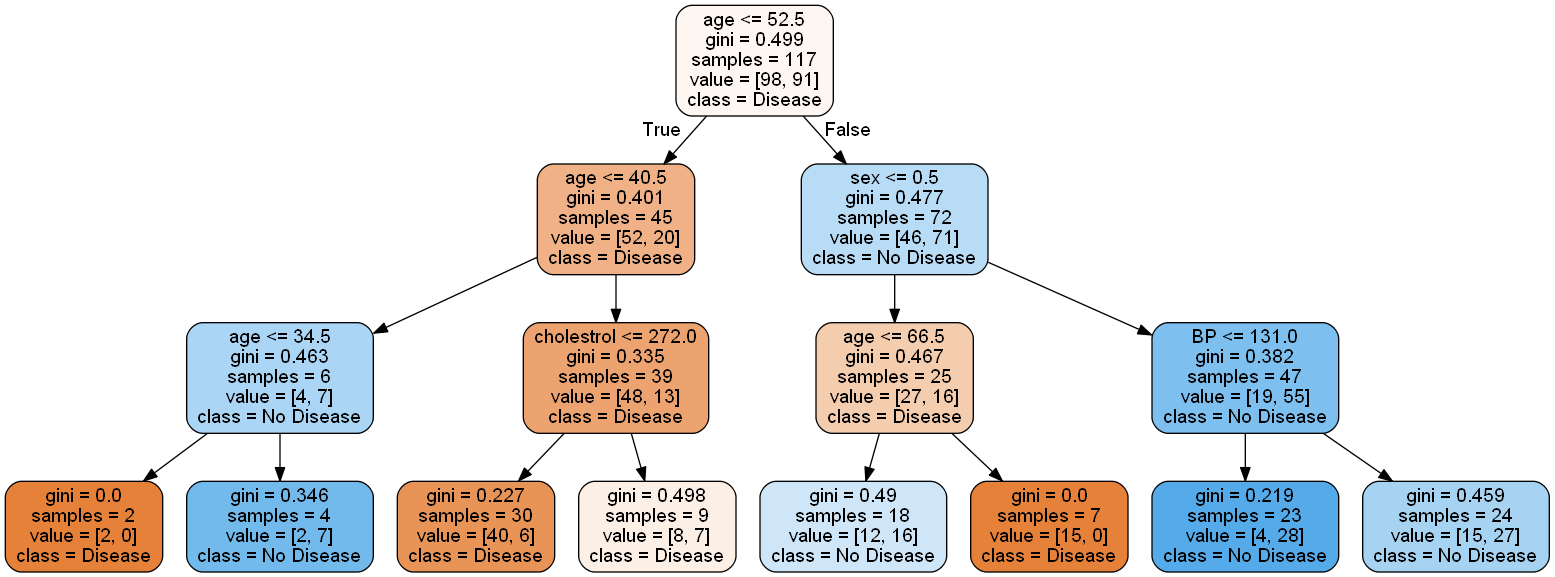

In [58]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

### OOB Score

In [59]:
rf = RandomForestClassifier(random_state=42, max_depth=3,n_estimators=10,oob_score=True)

In [60]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [61]:
rf.oob_score_

0.6370370370370371

In [62]:
evaluate_model(rf)

Train Accuracy : 0.7142857142857143
Train Confusion Matrix:
[[77 24]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6790123456790124
Test Confusion Matrix:
[[36 13]
 [13 19]]


In [64]:
import ast,sys
#input_str = sys.stdin.read()
input_list = [1,2,3,4,5,6,7,8,9]#ast.literal_eval(input())
input_k = ast.literal_eval(input())

result=[]
counter =1
temp_arr =[]
    
for i in input_list:
    temp_arr.append(i)
    if(counter==input_k):
        result.append(temp_arr)
        temp_arr=[]
        counter=0   
    counter+=1

if(len(temp_arr)>0):
    result.append(temp_arr)    
print(result)    


3
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [66]:
letters='ccwd'#input()#letters already in the crossword
guess='crossword'#input()#word to check for fit

index=0
check=[]

for i in letters:
    for j in range(index,len(guess)):
        if(i==guess[j]):
            check.append('yes')
            index=j+1
            break    
        if((j+1)==len(guess)):
            check.append('no')


if(len(set(check))==1):
    print('yes')
else:
    print('no')

no


In [68]:
import datetime


datetime.time

In [77]:
datetime.datetime.now()

datetime.datetime(2021, 7, 18, 14, 39, 38, 721370)

In [80]:
datetime.date.today()

datetime.date(2021, 7, 18)

In [120]:
import datetime,calendar
import ast,sys
input_str = [2017,1,1,2017,3,4]#sys.stdin.read()
input_list = [2017,8,2,2018,1,1]#[2017,2,1,2017,6,4]#ast.literal_eval(input_str)
dateStart=datetime.date(input_list[0],input_list[1],input_list[2])
dateEnd=datetime.date(input_list[3],input_list[4],input_list[5])


months_list=[]
months={}
no_of_months = (dateEnd.year - dateStart.year) * 12 + (dateEnd.month - dateStart.month) +1

for i in range(dateStart.month,(dateStart.month+no_of_months)):    
    if(i>12):
        months[(i-12)]=calendar.month_name[(i-12)]
    else:
        months[i]=calendar.month_name[i]

for i in sorted(months.keys()):
    months_list.append(months.get(i))
print(months_list)

['January', 'August', 'September', 'October', 'November', 'December']


In [122]:
input_list= [[1,2,3],[],[4,5],[],[],[6,7,8]]
output_list=[]
for i in input_list:
    if(len(i)>0):
        output_list.append(i)
print(output_list)

[[1, 2, 3], [4, 5], [6, 7, 8]]


In [124]:
[x for x in input_list if len(x)>0]

[[1, 2, 3], [4, 5], [6, 7, 8]]